### Model Predicting Fire & Non Fire Using Green Hot Images  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
import os

path = os.listdir('E:/GreenHot(Dataset)/')
classes = {'No_Fire':0, 'Fire':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'E:/GreenHot(Dataset)/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)

array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

0    4694
1    4520
dtype: int64

In [7]:
X.shape,Y.shape

((9214, 200, 200), (9214,))

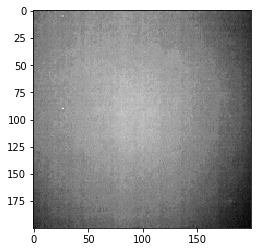

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(9214, 40000)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, test_size=0.3, random_state=42)

In [11]:
X_train.shape, X_test.shape

((6449, 40000), (2765, 40000))

In [12]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [203]:
# #Applying PCA
# from sklearn.decomposition import PCA
# pca = PCA(.98)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [13]:
X_train.shape,X_test.shape

((6449, 40000), (2765, 40000))

## Training Different Models  

In [14]:
#Training the logistic regression model
from sklearn.linear_model import LogisticRegression
Lr_classifier = LogisticRegression(random_state=0)
Lr_classifier.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#Training the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB , BernoulliNB ,MultinomialNB # GaussianNB : For Continuous distribution of data , BernoulliNB: For the dataset having only two classes i.e 0 & 1 , MultinomialNB: For the dataset having count or we can say how many times word repeated ..mostly used for NLP .

NB = BernoulliNB()

NB.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [63]:
# # Training the K - Nearest Neighbour Model
# from sklearn.neighbors import KNeighborsClassifier

# # Choosing correct value of K 
# error_rate = []

# # Will take some time
# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
    
#     knn.fit(X_train,y_train)
    
#     pred_i = knn.predict(X_test)
    
#     error_rate.append(np.mean(pred_i != y_test))

In [64]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

In [65]:
# # NOW WITH K=15
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=15)

# knn.fit(X_train,y_train)

In [18]:
# Training the Random Forest  Model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
# Training the SVM Model
from sklearn.svm import SVC
Svc_classifier = SVC()
Svc_classifier.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Evaluation of Models

In [20]:
print("Training Score:", Lr_classifier.score(X_train, y_train))
print("Testing Score:", Lr_classifier.score(X_test, y_test))

Training Score: 0.9965886183904481
Testing Score: 0.898372513562387


In [62]:
# print("Training Score:", knn.score(X_train, y_train))
# print("Testing Score:", knn.score(X_test, y_test))

In [21]:
print("Training Score:", NB.score(X_train, y_train))
print("Testing Score:",  NB.score(X_test, y_test))

Training Score: 0.6594820902465498
Testing Score: 0.6896925858951175


In [22]:
print("Training Score:", clf.score(X_train, y_train))
print("Testing Score:", clf.score(X_test, y_test))

Training Score: 0.9967436811908823
Testing Score: 0.9707052441229657


In [23]:
print("Training Score:", Svc_classifier.score(X_train, y_train))
print("Testing Score:", Svc_classifier.score(X_test, y_test))

Training Score: 0.9002946193208249
Testing Score: 0.8980108499095841


## Prediction

In [24]:
Svm_pred = Svc_classifier.predict(X_test)

In [25]:
Lr_pred = Lr_classifier.predict(X_test)

In [26]:
clf_pred = clf.predict(X_test)

In [59]:
misclassified=np.where(y_test!=clf_pred)
misclassified

(array([ 109,  149,  162,  165,  192,  223,  226,  240,  299,  313,  332,
         336,  369,  517,  552,  597,  639,  706,  725,  726,  738,  838,
         841,  979, 1062, 1082, 1098, 1125, 1162, 1175, 1179, 1223, 1260,
        1308, 1326, 1355, 1360, 1373, 1384, 1397, 1413, 1415, 1464, 1479,
        1512, 1567, 1592, 1619, 1639, 1678, 1726, 1752, 1780, 1790, 1814,
        1899, 1918, 1919, 1939, 2017, 2049, 2066, 2076, 2124, 2150, 2178,
        2250, 2336, 2353, 2388, 2403, 2426, 2502, 2512, 2529, 2566, 2569,
        2595, 2644, 2657, 2729], dtype=int64),)

In [60]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(clf_pred[36],y_test[36])

Total Misclassified Samples:  81
1 1


# Test Model

In [34]:
dec = {0:'No_Fire', 1:'Fire'}

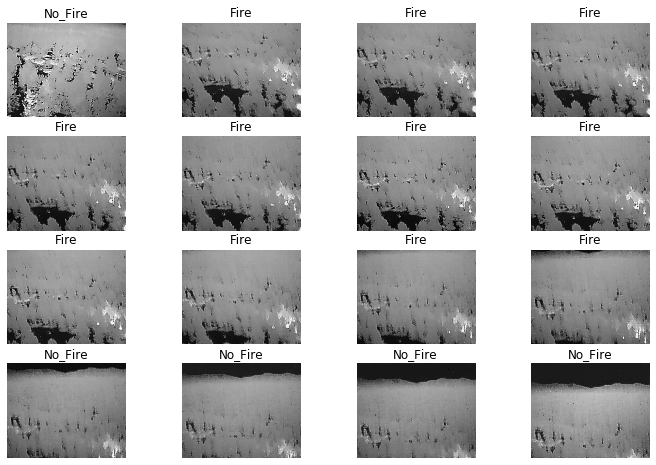

In [61]:
plt.figure(figsize=(12,8))
p = os.listdir('Datasets/Machine Learning (Data)/Testing set/')
c=1
for i in os.listdir('Datasets/Machine Learning (Data)/Testing Set/Test Image/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('Datasets/Machine Learning (Data)/Testing set/Test Image/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = clf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1